<a href="https://colab.research.google.com/github/xdanvieira/mod_13/blob/main/Profissao_Cientista_de_Dados_M13_Projeto_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [9]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [11]:
#Seu código aqui para a média
media_por_categoria = df.groupby("Categoria")["Preco_Normal"].mean()


# Exibir os resultados
print(media_por_categoria)


Categoria
belleza-y-cuidado-personal    1783.556485
comidas-preparadas            3095.043478
congelados                    2108.042553
frutas                        1724.473684
instantaneos-y-sopas           765.491228
lacteos                       2385.219239
verduras                      1343.296875
Name: Preco_Normal, dtype: float64


In [12]:
#Seu código aqui para a mediana

mediana_por_categoria = df.groupby("Categoria")["Preco_Normal"].median()

# Exibir os resultados
print(mediana_por_categoria)


Categoria
belleza-y-cuidado-personal    1569.0
comidas-preparadas            3290.0
congelados                    1519.0
frutas                        1195.0
instantaneos-y-sopas           439.0
lacteos                        989.0
verduras                      1180.0
Name: Preco_Normal, dtype: float64


[texto do link](https://)Digite aqui as categorias: lacteos e belleza-y-cuidado-personal


*texto em itálico*# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [14]:
#Seu código aqui

desvio_padrao_por_categoria = df.groupby("Categoria")["Preco_Normal"].std()

print(desvio_padrao_por_categoria)

Categoria
belleza-y-cuidado-personal    2210.041719
comidas-preparadas            2019.911428
congelados                    2111.539896
frutas                        1639.151114
instantaneos-y-sopas          1170.232869
lacteos                       3925.816164
verduras                      1012.699625
Name: Preco_Normal, dtype: float64


Digite nesse campo o comportamento que você identificou.

o comportamento confirmou que a categoria lacteos tem o maior desvio padrão.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

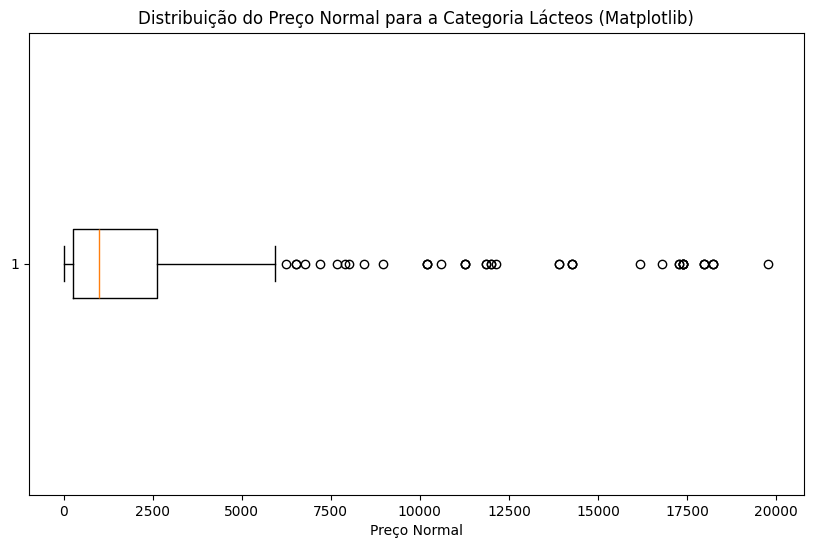

In [15]:
#Seu código aqui

lacteos_data = df[df['Categoria'] == 'lacteos']

# Criar o boxplot com matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot(lacteos_data['Preco_Normal'], vert=False)
plt.title('Distribuição do Preço Normal para a Categoria Lácteos (Matplotlib)')
plt.xlabel('Preço Normal')
plt.show()


resposta:
Segundo o boxplot, mostra que os preços normais dos lácteos variam de aproximadamente 0 a 6.500.  A maior parte dos dados está concentrada entre 0 e 2.500. Já a mediana deve ser aproximadamente 1000. a distribuição é assimétrica à direita. Sobre os outliers, existem muito pontos além de 6.500.


# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

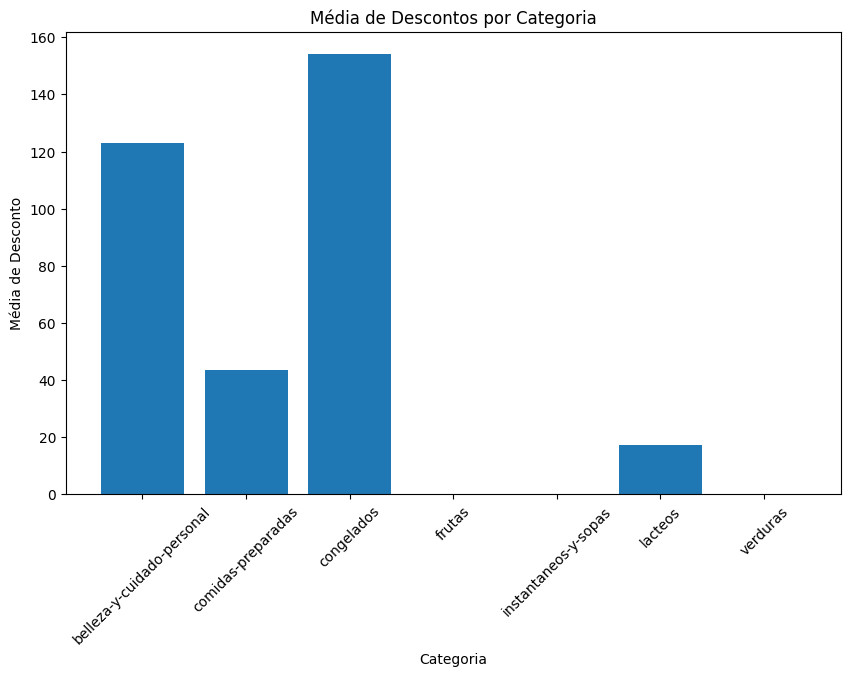

In [16]:
# Seu código aqui

media_descontos = df.groupby('Categoria')['Desconto'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(media_descontos['Categoria'], media_descontos['Desconto'])
plt.title('Média de Descontos por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Média de Desconto')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.show()


# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [17]:
# Seu código aqui


# Simular dados de localização (latitude e longitude) para cada marca
# Isso é apenas um exemplo, pois o arquivo original não tem informações geográficas
localizacao_marcas = {
    'Loncoleche': {'lat': -33.4489, 'lon': -70.6693},  # Santiago, Chile
    'Soprole': {'lat': -33.0365, 'lon': -71.5899},     # Valparaíso, Chile
    'Colun': {'lat': -39.8142, 'lon': -73.2459},       # Valdivia, Chile
    'Nido': {'lat': -12.0464, 'lon': -77.0428},        # Lima, Peru
    'Cuisine & Co': {'lat': -34.6037, 'lon': -58.3816} # Buenos Aires, Argentina
}

# Adicionar latitude e longitude ao DataFrame
df['lat'] = df['Marca'].map(lambda x: localizacao_marcas.get(x, {}).get('lat', 0))
df['lon'] = df['Marca'].map(lambda x: localizacao_marcas.get(x, {}).get('lon', 0))

# Calcular a média de descontos por categoria e marca
media_descontos = df.groupby(['Categoria', 'Marca', 'lat', 'lon'], as_index=False)['Desconto'].mean()

# Criar o mapa interativo
fig = px.scatter_geo(
    media_descontos,
    lat='lat',
    lon='lon',
    color='Categoria',  # Agrupar por categoria
    size='Desconto',    # Tamanho do marcador proporcional ao desconto médio
    hover_name='Marca', # Nome exibido ao passar o mouse
    hover_data={'Desconto': ':.2f'},  # Formatar o desconto com 2 casas decimais
    title='Média de Descontos por Categoria e Marca'
)

# Ajustar o layout do mapa
fig.update_geos(
    projection_type="natural earth",  # Tipo de projeção do mapa
    showcountries=True,               # Mostrar fronteiras dos países
    coastlinecolor="Black",           # Cor da costa
)

# Exibir o mapa
fig.show()
